In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

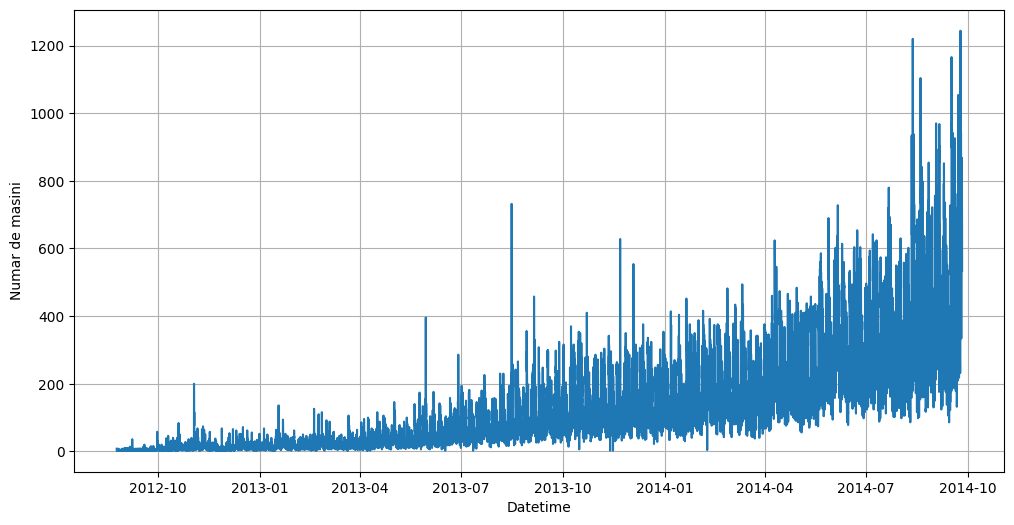

Frecvența de eșantionare este 0.00027779296768195986 Hz


In [21]:
# Pct a
dataset = pd.read_csv('data/Train.csv')
dataset['Datetime'] = pd.to_datetime(dataset['Datetime'], format='%d-%m-%Y %H:%M')

dateTime = dataset.iloc[:, 1: 2].values
count = dataset.iloc[:, 2:].values

plt.figure(figsize=(12, 6))
plt.plot(dateTime, count)
plt.xlabel('Datetime')
plt.ylabel('Numar de masini')
plt.grid(True)

if not os.path.exists('pct_a'):
    os.mkdir('pct_a')

plt.savefig(os.path.join('pct_a', f"pct_a.png"))
plt.savefig(os.path.join('pct_a', f"pct_a.pdf"))

plt.show()

start_time = dataset['Datetime'].iloc[0]
end_time = dataset['Datetime'].iloc[-1]
diff = end_time - start_time

total_samples = len(dataset)
sampling_rate = total_samples / diff.total_seconds()

print(f'Frecvența de eșantionare este {sampling_rate} Hz')

In [22]:
# Pct b
print(f'Intervalul de timp acoperit de setul de date este {diff}')

Intervalul de timp acoperit de setul de date este 761 days 23:00:00


In [23]:
# Pct c
max_frequency = count.max()
print(f'Frecvența maximă este {max_frequency} Hz')

Frecvența maximă este 1244 Hz


18288


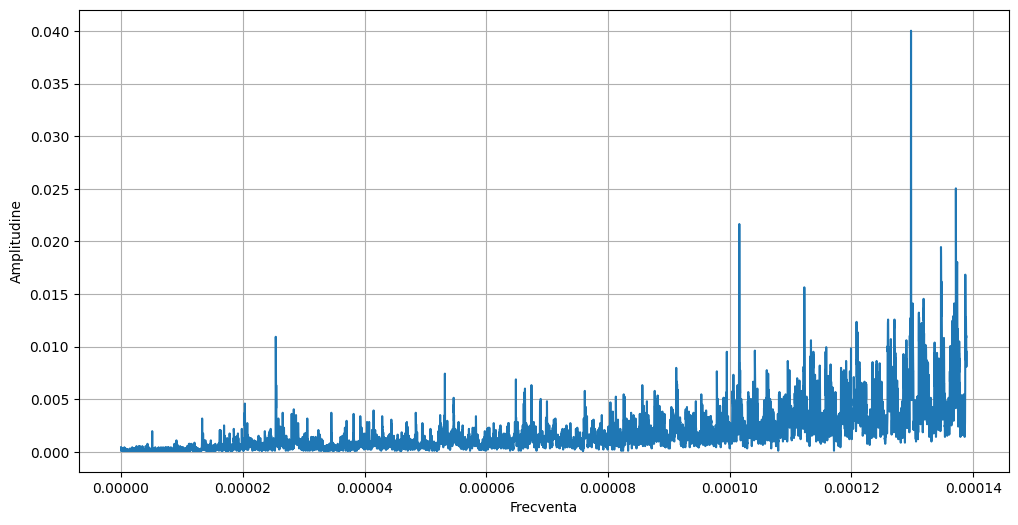

In [30]:
# Pct d
N = len(count)
print(N)
fft_result = np.fft.fft(count)
fft_result = np.abs(fft_result / N)
fft_result = fft_result[:N // 2]

freq = sampling_rate * np.linspace(0, int(N/2), int(N/2)) / N

plt.figure(figsize=(12, 6))
plt.plot(freq, fft_result)
plt.xlabel('Frecventa')
plt.ylabel('Amplitudine')
plt.grid(True)

if not os.path.exists('pct_d'):
    os.mkdir('pct_d')

plt.savefig(os.path.join('pct_d', f"pct_d.png"))
plt.savefig(os.path.join('pct_d', f"pct_d.pdf"))

plt.show()